In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
import shap
import warnings

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_excel("10Alytics Hackathon- Fiscal Data.xlsx", sheet_name = "Data")
case_study = pd.read_excel("10Alytics Hackathon- Fiscal Data.xlsx", sheet_name = 0)

In [3]:
case_study

,"Background: Across many developing economies — including Nigeria and other African countries — fiscal, economic, and demographic data remain under-utilized in policymaking, leading to persistent challenges such as inefficient public spending, weak revenue mobilization, rising inflation, unemployment, and widening inequality. Although governments collect vast amounts of information on budgets, GDP, trade, taxation, health and population dynamics, these datasets are rarely integrated, analysed, or translated into actionable insights that support sustainable development.\nProblem Statement: This hackathon challenges participants to use AI, data science, and analytical modelling to transform fragmented macroeconomic and fiscal indicators — such as Budget Balance, Capital and Health Expenditure, Nominal vs Real GDP, Inflation, VAT, Trade Data, Unemployment, Government Debt, and Population metrics — into meaningful intelligence that can strengthen governance, support inclusive growth, and drive evidence-based policy choices.\nBy connecting these datasets to measurable development outcomes, participants will generate solutions that directly advance the Sustainable Development Goals (SDGs), including:\nSDG 1 & 2: Understanding income, inflation, food prices, and unemployment trends to reduce poverty and hunger.\nSDG 3: Linking health expenditure, population data, and real GDP to health system performance.\nSDG 4: Using revenue and expenditure patterns to evaluate education financing gaps.\nSDG 8: Leveraging GDP growth, unemployment, tax revenue, and trade data to promote decent work and economic growth.\nSDG 9: Analysing capital expenditure and government debt to strengthen infrastructure planning.\nSDG 10: Using fiscal insights to address inequality through progressive and transparent resource allocation.\nSDG 16: Improving public finance transparency, accountability, and data-driven governance.\n"


In [4]:
data

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138
...,...,...,...,...,...,...,...,...,...
23779,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2019-01-01,4781.6
23780,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2020-01-01,5184
23781,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2021-01-01,5218
23782,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2022-01-01,6298


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       23784 non-null  object        
 1   Indicator     23784 non-null  object        
 2   Source        23784 non-null  object        
 3   Unit          23762 non-null  object        
 4   Currency      13281 non-null  object        
 5   Frequency     23784 non-null  object        
 6   Country Code  23784 non-null  object        
 7   Time          23780 non-null  datetime64[ns]
 8   Amount        23725 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.6+ MB


In [6]:
data.describe(include = "all")

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
count,23784,23784,23784,23762,13281,23784,23784,23780,23725.0
unique,14,27,28,10,13,3,14,NaN,15204.0
top,South Africa,Inflation Rate,Central Bank of West African States,Million,ZAR,Monthly,ZAF,NaN,12.0
freq,5108,2879,3295,9964,3086,16850,5108,NaN,217.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-27 20:37:22.960471040,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960-01-01 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-10-01 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-01 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01 00:00:00,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-01 00:00:00,NaN


In [149]:
df = data.copy()

In [150]:
print("\n---- BASIC SHAPE ----")
print(df.shape)

print("\n---- INDICATOR COUNTS ----")
df["Indicator"].value_counts()





---- BASIC SHAPE ----
(23784, 9)

---- INDICATOR COUNTS ----


Indicator
Inflation Rate                2879
Consumer Price Index (CPI)    2850
Interest Rate                 2652
Revenue                       1752
Exports                       1611
Imports                       1590
Budget Deficit/Surplus        1417
Government Debt               1121
Food Inflation                1069
Nominal GDP                   1008
Real GDP                      1001
GDP Growth Rate                962
Expenditure                    961
Tax Revenue                    762
Capital Expenditure            663
Value Added Tax (VAT)          376
Population                     323
Unemployment Rate              218
Defence Expenditure            140
Labour Force                   132
Inflation Rate                 124
Health Expenditure              43
GDP per Capita                  41
GDP per Capita                  30
Food Inflation YoY              30
Education Expenditure           19
GDP per capita                  10
Name: count, dtype: int64

In [151]:
print("\n---- COUNTRY COUNTS ----")
df["Country"].value_counts()


---- COUNTRY COUNTS ----


Country
South Africa    5108
Kenya           2904
Nigeria         2855
Ghana           2677
Egypt           1845
Togo            1816
Ivory Coast     1479
Rwanda          1314
Algeria         1209
Tanzania        1021
Angola           582
Senegal          523
Botswana         274
Ethiopia         177
Name: count, dtype: int64

In [152]:

print("\n---- MISSING VALUES Percentage ----")
(df.isnull().sum()/len(df) * 100).round(1)



---- MISSING VALUES Percentage ----


Country          0.0
Indicator        0.0
Source           0.0
Unit             0.1
Currency        44.2
Frequency        0.0
Country Code     0.0
Time             0.0
Amount           0.2
dtype: float64

In [153]:
df["Amount_clean"] = (
    df["Amount"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .replace({"nan": None, "None": None})
)
df["Amount"] = pd.to_numeric(df["Amount_clean"], errors="coerce")

df.drop("Amount_clean", axis = 1, inplace = True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       23784 non-null  object        
 1   Indicator     23784 non-null  object        
 2   Source        23784 non-null  object        
 3   Unit          23762 non-null  object        
 4   Currency      13281 non-null  object        
 5   Frequency     23784 non-null  object        
 6   Country Code  23784 non-null  object        
 7   Time          23780 non-null  datetime64[ns]
 8   Amount        23725 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.6+ MB


In [155]:
# --- Standardize Units ---
unit_map = {
    "Million": 1_000_000,
    "Billion": 1_000_000_000,
    "Thousand": 1_000,
    "%": 0.01
}

df["Unit_clean"] = df["Unit"].astype(str).str.strip().replace("nan", np.nan)
df["unit_multiplier"] = df["Unit_clean"].map(unit_map).fillna(1)

df["Amount_standard"] = df["Amount"] * df["unit_multiplier"]


In [156]:
df

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213.0,Million,1.000000e+06,-5.621300e+10
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563.0,Million,1.000000e+06,-6.756300e+10
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379.0,Million,1.000000e+06,-7.237900e+10
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886.0,Million,1.000000e+06,-9.888600e+10
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138.0,Million,1.000000e+06,-1.341380e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
23779,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2019-01-01,4781.6,Billion,1.000000e+09,4.781600e+12
23780,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2020-01-01,5184.0,Billion,1.000000e+09,5.184000e+12
23781,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2021-01-01,5218.0,Billion,1.000000e+09,5.218000e+12
23782,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2022-01-01,6298.0,Billion,1.000000e+09,6.298000e+12


In [157]:

# --- Extract year from Time ---
df["Year"] = pd.to_datetime(df["Time"], errors="coerce").dt.year


In [158]:
df["Year"] = df["Year"].astype("Int64")

In [159]:
df

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213.0,Million,1.000000e+06,-5.621300e+10,2007
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563.0,Million,1.000000e+06,-6.756300e+10,2008
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379.0,Million,1.000000e+06,-7.237900e+10,2009
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886.0,Million,1.000000e+06,-9.888600e+10,2010
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138.0,Million,1.000000e+06,-1.341380e+11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23779,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2019-01-01,4781.6,Billion,1.000000e+09,4.781600e+12,2019
23780,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2020-01-01,5184.0,Billion,1.000000e+09,5.184000e+12,2020
23781,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2021-01-01,5218.0,Billion,1.000000e+09,5.218000e+12,2021
23782,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2022-01-01,6298.0,Billion,1.000000e+09,6.298000e+12,2022


In [160]:
# --- Clean Indicator names for pivoting ---
df["Indicator"] = (
    df["Indicator"]
    .astype(str)
    .str.lower()
    .str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)
    .str.replace(r"\s+", "_", regex=True)
    .str.strip())

In [161]:
mask = df["Indicator"] == "budget_deficitsurplus"

df.loc[mask & (df["Amount_standard"] < 0), "Indicator"] = "budget_deficit"
df.loc[mask & (df["Amount_standard"] > 0), "Indicator"] = "budget_surplus"


In [162]:
df.head()

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year
0,Egypt,budget_deficit,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213.0,Million,1000000.0,-5.621300e+10,2007
1,Egypt,budget_deficit,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563.0,Million,1000000.0,-6.756300e+10,2008
2,Egypt,budget_deficit,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379.0,Million,1000000.0,-7.237900e+10,2009
3,Egypt,budget_deficit,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886.0,Million,1000000.0,-9.888600e+10,2010
4,Egypt,budget_deficit,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138.0,Million,1000000.0,-1.341380e+11,2011


In [163]:
print("\n---- CLEANED AMOUNT SUMMARY ----")
df["Amount_standard"].describe()



---- CLEANED AMOUNT SUMMARY ----


count    2.372500e+04
mean     1.065291e+12
std      7.103154e+12
min     -1.350182e+13
25%      8.700000e-02
50%      2.100000e+02
75%      9.128200e+10
max      2.774938e+14
Name: Amount_standard, dtype: float64

In [164]:
print("\n---- YEAR RANGE ----")
print(df["Year"].min(), df["Year"].max())



---- YEAR RANGE ----
1960 2025


In [165]:
print("\n---- CLEAN INDICATOR SAMPLE ----")
(df["Indicator"].value_counts().head())


---- CLEAN INDICATOR SAMPLE ----


Indicator
inflation_rate_             2879
consumer_price_index_cpi    2850
interest_rate               2652
revenue                     1752
exports                     1611
Name: count, dtype: int64

In [166]:
df.describe(include = "all")

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year
count,23784,23784,23784,23762,13281,23784,23784,23780,2.372500e+04,23762,2.378400e+04,2.372500e+04,23780.0
unique,14,28,28,10,13,3,14,NaN,NaN,10,NaN,NaN,<NA>
top,South Africa,inflation_rate_,Central Bank of West African States,Million,ZAR,Monthly,ZAF,NaN,NaN,Million,NaN,NaN,<NA>
freq,5108,2879,3295,9964,3086,16850,5108,NaN,NaN,9964,NaN,NaN,<NA>
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-27 20:37:22.960471040,2.917036e+06,NaN,7.988412e+07,1.065291e+12,2009.788015
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960-01-01 00:00:00,-1.350182e+07,NaN,1.000000e-02,-1.350182e+13,1960.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-10-01 00:00:00,8.250000e+00,NaN,1.000000e-02,8.700000e-02,2005.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-01 00:00:00,1.292000e+02,NaN,1.000000e+00,2.100000e+02,2014.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01 00:00:00,5.395800e+04,NaN,1.000000e+06,9.128200e+10,2019.0
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-01 00:00:00,7.633725e+08,NaN,1.000000e+09,2.774938e+14,2025.0


In [167]:
trend = df.groupby("Year")["Amount"].mean().reset_index()
trend

,Year,Amount
0,1960,3.396531e+05
1,1961,3.062308e+05
2,1962,3.131764e+05
3,1963,3.205367e+05
4,1964,3.238171e+05
...,...,...
61,2021,6.228091e+06
62,2022,7.800063e+06
63,2023,8.736915e+06
64,2024,8.197685e+06


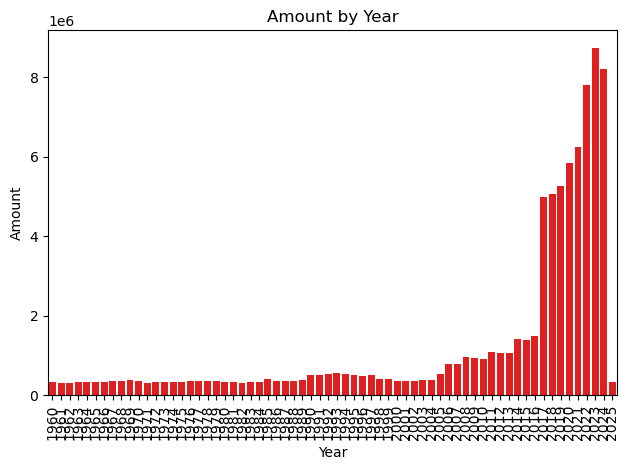

In [168]:
sns.barplot(data = trend, x = "Year", y = "Amount", color = "r")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Amount by Year")
plt.tight_layout();

plt.savefig("amount per year")

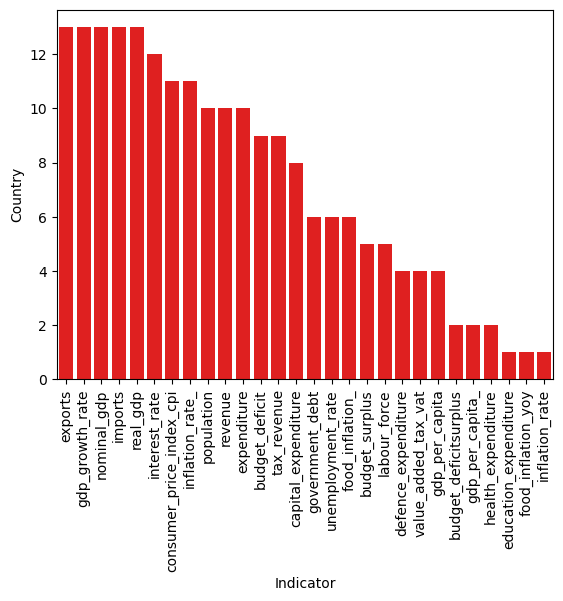

In [169]:
indicators = df.groupby("Indicator")["Country"].nunique().reset_index().sort_values(by = "Country", ascending=False)

sns.barplot(data=indicators, x="Indicator", y="Country", color = "r")
plt.xticks(rotation=90);

plt.savefig("unique country indicators")

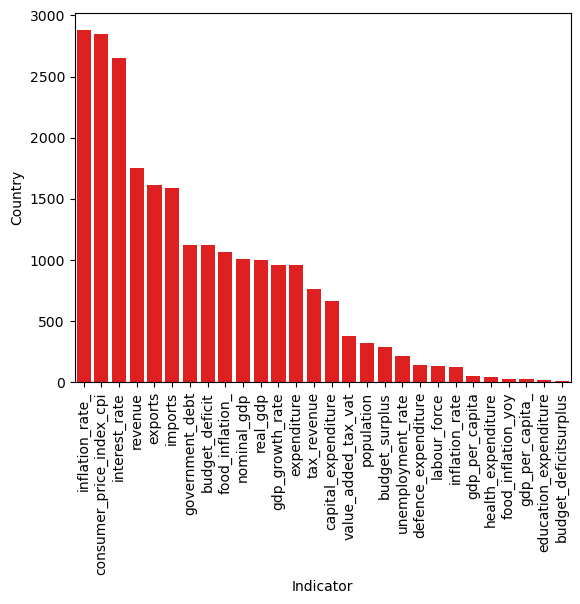

In [170]:
indicators = df.groupby(["Indicator"])["Country"].count().reset_index().sort_values(by = "Country", ascending=False)

sns.barplot(data=indicators, x="Indicator", y="Country", color = "r")
plt.xticks(rotation=90);

plt.savefig("count of each country indicators")

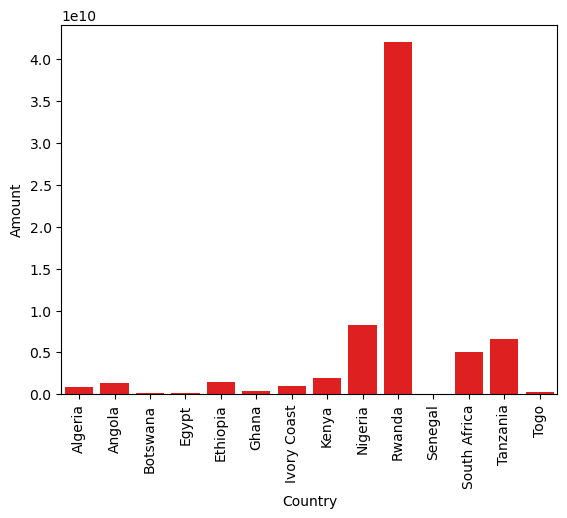

In [171]:
agg = df.groupby("Country")["Amount"].sum().reset_index()

sns.barplot(data=agg, x="Country", y="Amount", color = "r")
plt.xticks(rotation=90);

plt.savefig("country amount sum")

In [172]:
agg = df.groupby("Country")["Amount"].sum().reset_index()
agg


,Country,Amount
0,Algeria,8.166586e+08
1,Angola,1.348977e+09
2,Botswana,9.635614e+07
3,Egypt,1.090712e+08
4,Ethiopia,1.404139e+09
5,Ghana,3.798165e+08
6,Ivory Coast,9.494276e+08
7,Kenya,1.887612e+09
8,Nigeria,8.251809e+09
9,Rwanda,4.204527e+10


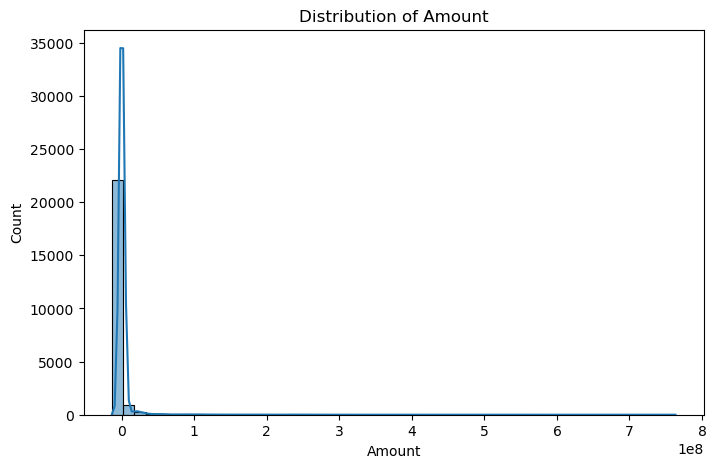

In [173]:
plt.figure(figsize=(8,5))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Amount")
plt.show()


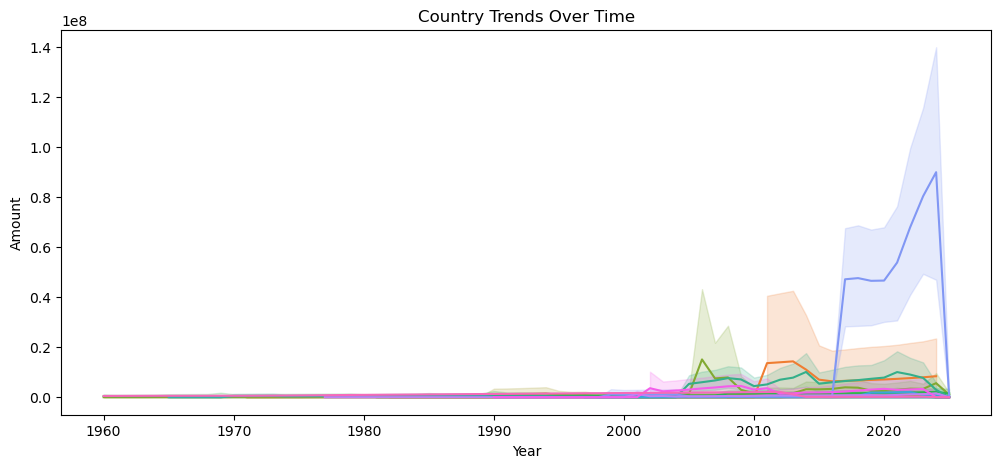

In [118]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="Year", y="Amount", hue="Country", legend=False)
plt.title("Country Trends Over Time")
plt.show()

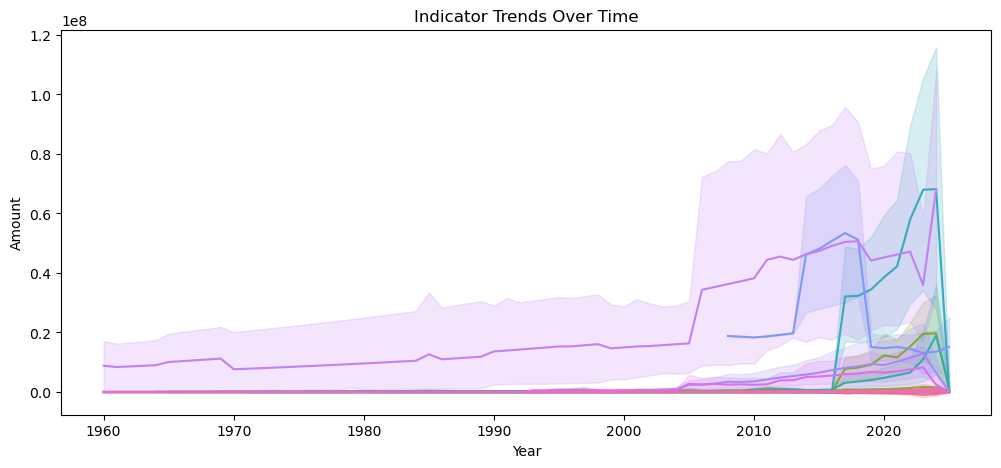

In [119]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="Year", y="Amount", hue="Indicator", legend=False)
plt.title("Indicator Trends Over Time")
plt.show()

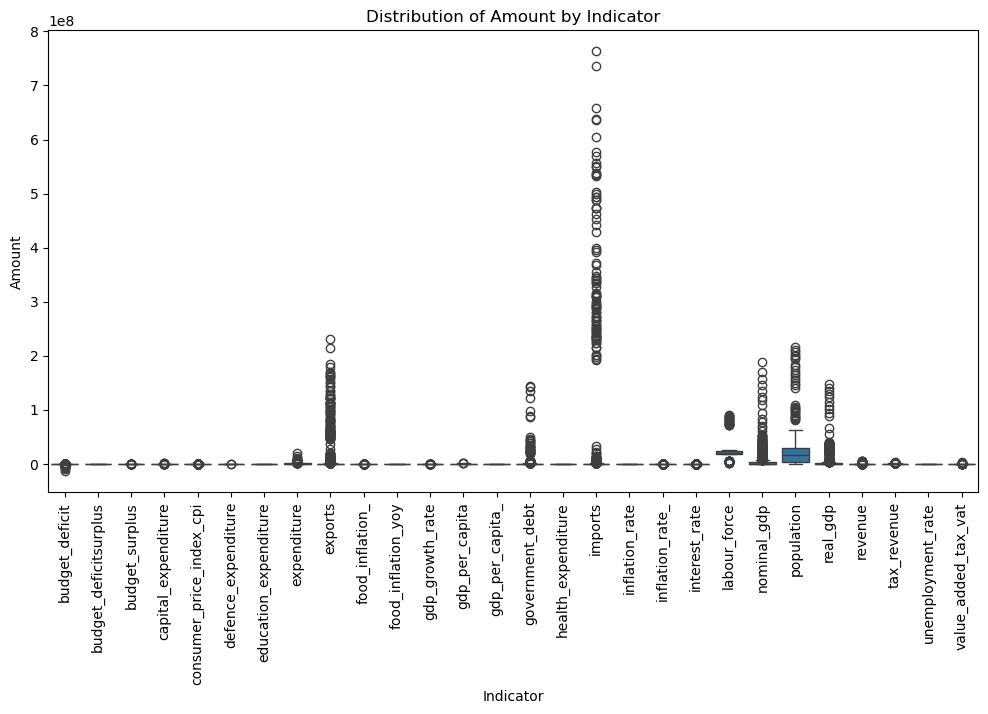

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Indicator", y="Amount")
plt.xticks(rotation=90)
plt.title("Distribution of Amount by Indicator")
plt.show()

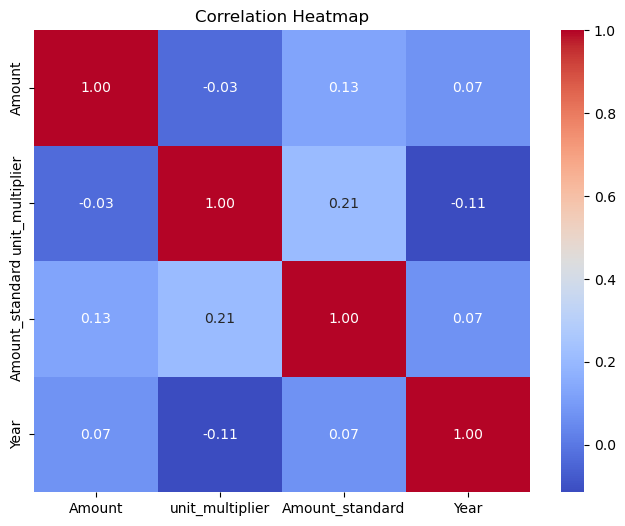

<Figure size 640x480 with 0 Axes>

In [174]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.savefig("corrolation")

Country             0.00
Indicator           0.00
Source              0.00
Unit                0.09
Currency           44.16
Frequency           0.00
Country Code        0.00
Time                0.02
Amount              0.25
Unit_clean          0.09
unit_multiplier     0.00
Amount_standard     0.25
Year                0.02
dtype: float64


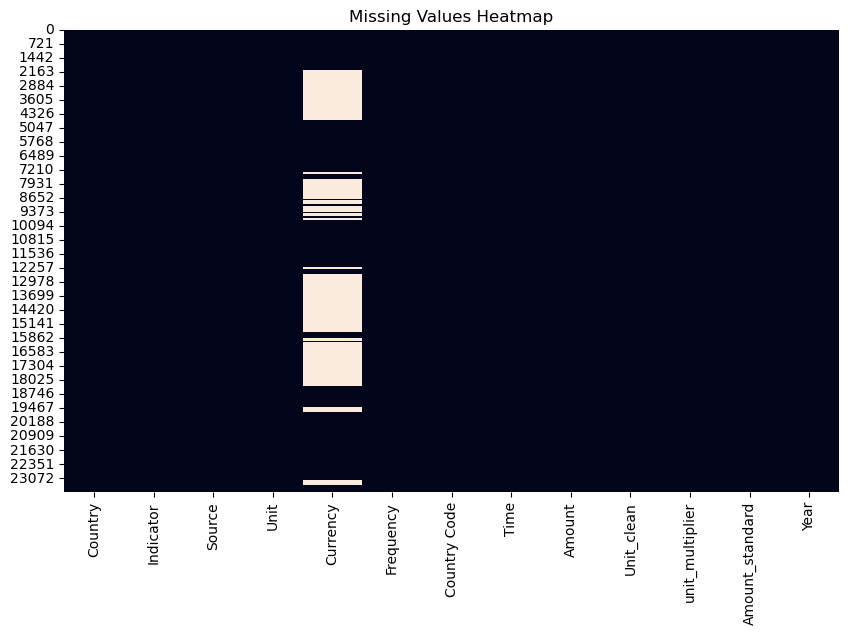

In [122]:
# Missing values percentage
missing_pct = (df.isna().mean() * 100).round(2)
print(missing_pct)

# Missing heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


is_outlier
False    23580
True       204
Name: count, dtype: int64


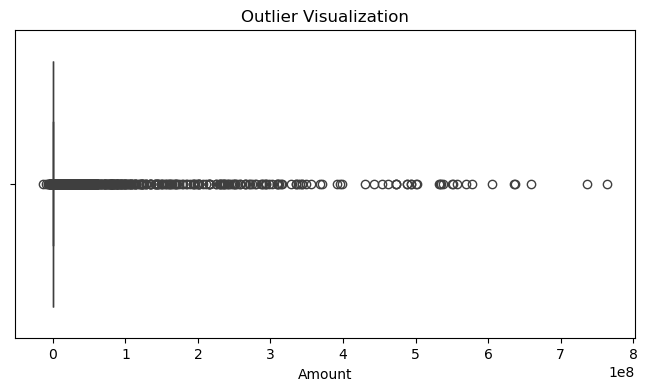

In [123]:

from scipy.stats import zscore

df["zscore_amount"] = zscore(df["Amount"].astype(float), nan_policy='omit')

# Mark extreme outliers
df["is_outlier"] = df["zscore_amount"].abs() > 3

print(df["is_outlier"].value_counts())

# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Amount"])
plt.title("Outlier Visualization")
plt.show()



In [175]:
# ==========================================
# 3. SKEWNESS & TRANSFORMATIONS
# ==========================================

# Check skewness
print("Skewness:", df["Amount"].skew())




Skewness: 15.660016674511022


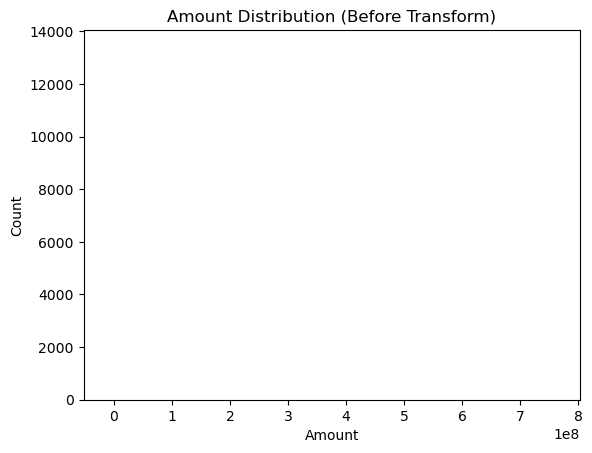

<Figure size 640x480 with 0 Axes>

In [39]:
sns.histplot(df["Amount"], kde=False)
plt.title("Amount Distribution (Before Transform)")
plt.show()

plt.savefig("Amount Distribution (Before Transform)")


In [176]:
# Log transform
df["Amount_log"] = np.log1p(df["Amount"])


In [130]:

plt.figure(figsize=(8,5))
sns.histplot(df["Amount_log"], kde=True)
plt.title("Amount Distribution (After Log Transform)")
plt.show()

plt.savefig("Amount Distribution (after Transform)")


In [177]:
df = df.sort_values(["Country", "Indicator", "Time"])
df["YoY_Growth"] = df.groupby(["Country", "Indicator"])["Amount"].pct_change()


df["Yearly_Change"] = df.groupby(["Country", "Indicator"])["Amount"].diff()


df["Rolling_Mean"] = (
    df.groupby(["Country", "Indicator"])["Amount"]
    .rolling(3)
    .mean()
    .droplevel([0, 1]) # Corrected: Use droplevel to align indices
)

df["Rolling_STD"] = (
    df.groupby(["Country", "Indicator"])["Amount"]
    .rolling(3)
    .std()
    .droplevel([0, 1]) # Corrected: Use droplevel to align indices
)


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23784 entries, 2080 to 23189
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          23784 non-null  object        
 1   Indicator        23784 non-null  object        
 2   Source           23784 non-null  object        
 3   Unit             23762 non-null  object        
 4   Currency         13281 non-null  object        
 5   Frequency        23784 non-null  object        
 6   Country Code     23784 non-null  object        
 7   Time             23780 non-null  datetime64[ns]
 8   Amount           23725 non-null  float64       
 9   Unit_clean       23762 non-null  object        
 10  unit_multiplier  23784 non-null  float64       
 11  Amount_standard  23725 non-null  float64       
 12  Year             23780 non-null  Int64         
 13  Amount_log       22261 non-null  float64       
 14  YoY_Growth       23573 non-null  float64

In [179]:
df = df.sort_values(["Country", "Indicator", "Year"])

df["Target_Improve"] = (
    df.groupby(["Country", "Indicator"])["Amount"].shift(-1) > df["Amount"]
).astype(int)


In [180]:
df.head()

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year,Amount_log,YoY_Growth,Yearly_Change,Rolling_Mean,Rolling_STD,Target_Improve
2080,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NaN,Monthly,DZA,2002-01-01,101.74,Points,1.0,101.74,2002,4.632202,NaN,NaN,NaN,NaN,1
2081,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NaN,Monthly,DZA,2002-02-01,102.16,Points,1.0,102.16,2002,4.636281,0.004128,0.42,NaN,NaN,0
2082,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NaN,Monthly,DZA,2002-03-01,101.94,Points,1.0,101.94,2002,4.634146,-0.002153,-0.22,101.946667,0.210079,0
2083,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NaN,Monthly,DZA,2002-04-01,101.34,Points,1.0,101.34,2002,4.628301,-0.005886,-0.60,101.813333,0.424421,0
2084,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NaN,Monthly,DZA,2002-05-01,100.61,Points,1.0,100.61,2002,4.621142,-0.007203,-0.73,101.296667,0.666058,0


In [181]:
# 1. Fill Amount using time-series logic
df = df.sort_values(["Country", "Indicator", "Year"])
df["Amount"] = df.groupby(["Country", "Indicator"])["Amount"].transform(lambda x: x.ffill().bfill())

# 2. Fix Year
df["Year"] = df["Year"].bfill().astype("Int64")

# 3. Currency: NA means “not applicable”
df["Currency"] = df["Currency"].fillna("NA")

# 4. Unit
df["Unit"] = df["Unit"].fillna("Unknown")

# 5. Amount_log (log cannot handle negative)
df["Amount_log"] = df["Amount_log"].fillna(df["Amount_log"].median())

# 6. Time-series derived metrics
for col in ["YoY_Growth", "Yearly_Change", "Rolling_Mean", "Rolling_STD"]:
    df[col] = df[col].fillna(0)


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23784 entries, 2080 to 23189
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          23784 non-null  object        
 1   Indicator        23784 non-null  object        
 2   Source           23784 non-null  object        
 3   Unit             23784 non-null  object        
 4   Currency         23784 non-null  object        
 5   Frequency        23784 non-null  object        
 6   Country Code     23784 non-null  object        
 7   Time             23780 non-null  datetime64[ns]
 8   Amount           23779 non-null  float64       
 9   Unit_clean       23762 non-null  object        
 10  unit_multiplier  23784 non-null  float64       
 11  Amount_standard  23725 non-null  float64       
 12  Year             23784 non-null  Int64         
 13  Amount_log       23784 non-null  float64       
 14  YoY_Growth       23784 non-null  float64

In [183]:
df_clean = df.copy()

In [184]:
df_clean

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year,Amount_log,YoY_Growth,Yearly_Change,Rolling_Mean,Rolling_STD,Target_Improve
2080,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-01-01,101.74,Points,1.000000e+00,1.017400e+02,2002,4.632202,0.000000,0.00,0.000000,0.000000,1
2081,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-02-01,102.16,Points,1.000000e+00,1.021600e+02,2002,4.636281,0.004128,0.42,0.000000,0.000000,0
2082,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-03-01,101.94,Points,1.000000e+00,1.019400e+02,2002,4.634146,-0.002153,-0.22,101.946667,0.210079,0
2083,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-04-01,101.34,Points,1.000000e+00,1.013400e+02,2002,4.628301,-0.005886,-0.60,101.813333,0.424421,0
2084,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-05-01,100.61,Points,1.000000e+00,1.006100e+02,2002,4.621142,-0.007203,-0.73,101.296667,0.666058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2020-01-01,655.20,Billion,1.000000e+09,6.552000e+11,2020,6.486466,0.046311,29.00,609.433333,56.063030,1
23186,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2021-01-01,779.60,Billion,1.000000e+09,7.796000e+11,2021,6.660063,0.189866,124.40,687.000000,81.494294,1
23187,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2022-01-01,864.80,Billion,1.000000e+09,8.648000e+11,2022,6.763654,0.109287,85.20,766.533333,105.409171,1
23188,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2023-01-01,991.60,Billion,1.000000e+09,9.916000e+11,2023,6.900328,0.146623,126.80,878.666667,106.678083,1


In [194]:
df = df_clean.copy()

In [195]:
df.dropna(inplace = True, axis = 0)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23699 entries, 2080 to 23189
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          23699 non-null  object        
 1   Indicator        23699 non-null  object        
 2   Source           23699 non-null  object        
 3   Unit             23699 non-null  object        
 4   Currency         23699 non-null  object        
 5   Frequency        23699 non-null  object        
 6   Country Code     23699 non-null  object        
 7   Time             23699 non-null  datetime64[ns]
 8   Amount           23699 non-null  float64       
 9   Unit_clean       23699 non-null  object        
 10  unit_multiplier  23699 non-null  float64       
 11  Amount_standard  23699 non-null  float64       
 12  Year             23699 non-null  Int64         
 13  Amount_log       23699 non-null  float64       
 14  YoY_Growth       23699 non-null  float64

In [197]:
df

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year,Amount_log,YoY_Growth,Yearly_Change,Rolling_Mean,Rolling_STD,Target_Improve
2080,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-01-01,101.74,Points,1.000000e+00,1.017400e+02,2002,4.632202,0.000000,0.00,0.000000,0.000000,1
2081,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-02-01,102.16,Points,1.000000e+00,1.021600e+02,2002,4.636281,0.004128,0.42,0.000000,0.000000,0
2082,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-03-01,101.94,Points,1.000000e+00,1.019400e+02,2002,4.634146,-0.002153,-0.22,101.946667,0.210079,0
2083,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-04-01,101.34,Points,1.000000e+00,1.013400e+02,2002,4.628301,-0.005886,-0.60,101.813333,0.424421,0
2084,Algeria,consumer_price_index_cpi,Bank of Algeria,Points,NA,Monthly,DZA,2002-05-01,100.61,Points,1.000000e+00,1.006100e+02,2002,4.621142,-0.007203,-0.73,101.296667,0.666058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2020-01-01,655.20,Billion,1.000000e+09,6.552000e+11,2020,6.486466,0.046311,29.00,609.433333,56.063030,1
23186,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2021-01-01,779.60,Billion,1.000000e+09,7.796000e+11,2021,6.660063,0.189866,124.40,687.000000,81.494294,1
23187,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2022-01-01,864.80,Billion,1.000000e+09,8.648000e+11,2022,6.763654,0.109287,85.20,766.533333,105.409171,1
23188,Togo,tax_revenue,Central Bank of West African States,Billion,XOF,Yearly,TGO,2023-01-01,991.60,Billion,1.000000e+09,9.916000e+11,2023,6.900328,0.146623,126.80,878.666667,106.678083,1


In [198]:
cols_to_drop = [
    "Source",
    "Unit",
    "Currency",
    "Frequency",
    "Country Code"
]

df.drop(cols_to_drop, inplace = True, axis = 1)

In [199]:
df.reset_index(inplace = True, drop = True)

In [200]:
df

,Country,Indicator,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year,Amount_log,YoY_Growth,Yearly_Change,Rolling_Mean,Rolling_STD,Target_Improve
0,Algeria,consumer_price_index_cpi,2002-01-01,101.74,Points,1.000000e+00,1.017400e+02,2002,4.632202,0.000000,0.00,0.000000,0.000000,1
1,Algeria,consumer_price_index_cpi,2002-02-01,102.16,Points,1.000000e+00,1.021600e+02,2002,4.636281,0.004128,0.42,0.000000,0.000000,0
2,Algeria,consumer_price_index_cpi,2002-03-01,101.94,Points,1.000000e+00,1.019400e+02,2002,4.634146,-0.002153,-0.22,101.946667,0.210079,0
3,Algeria,consumer_price_index_cpi,2002-04-01,101.34,Points,1.000000e+00,1.013400e+02,2002,4.628301,-0.005886,-0.60,101.813333,0.424421,0
4,Algeria,consumer_price_index_cpi,2002-05-01,100.61,Points,1.000000e+00,1.006100e+02,2002,4.621142,-0.007203,-0.73,101.296667,0.666058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Togo,tax_revenue,2020-01-01,655.20,Billion,1.000000e+09,6.552000e+11,2020,6.486466,0.046311,29.00,609.433333,56.063030,1
23695,Togo,tax_revenue,2021-01-01,779.60,Billion,1.000000e+09,7.796000e+11,2021,6.660063,0.189866,124.40,687.000000,81.494294,1
23696,Togo,tax_revenue,2022-01-01,864.80,Billion,1.000000e+09,8.648000e+11,2022,6.763654,0.109287,85.20,766.533333,105.409171,1
23697,Togo,tax_revenue,2023-01-01,991.60,Billion,1.000000e+09,9.916000e+11,2023,6.900328,0.146623,126.80,878.666667,106.678083,1


In [201]:
def remove_outliers_iqr(group):
    Q1 = group["YoY_Growth"].quantile(0.25)
    Q3 = group["YoY_Growth"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group["YoY_Growth"] >= lower) & (group["YoY_Growth"] <= upper)]

df_clean = df.groupby(["Country", "Indicator"], group_keys=False).apply(remove_outliers_iqr)


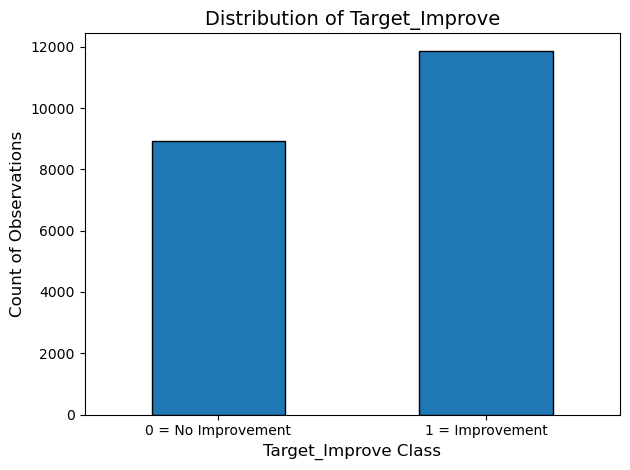

In [202]:

df_clean["Target_Improve"].value_counts().sort_index().plot(
    kind="bar",
    edgecolor="black"
)

plt.title("Distribution of Target_Improve", fontsize=14)
plt.xlabel("Target_Improve Class", fontsize=12)
plt.ylabel("Count of Observations", fontsize=12)
plt.xticks(ticks=[0,1], labels=["0 = No Improvement", "1 = Improvement"], rotation=0)

plt.tight_layout()

plt.savefig("target_improve_distribution.png", dpi=300)

plt.show()


In [203]:
df_clean

,Country,Indicator,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year,Amount_log,YoY_Growth,Yearly_Change,Rolling_Mean,Rolling_STD,Target_Improve
0,Algeria,consumer_price_index_cpi,2002-01-01,101.74,Points,1.000000e+00,1.017400e+02,2002,4.632202,0.000000,0.00,0.000000,0.000000,1
1,Algeria,consumer_price_index_cpi,2002-02-01,102.16,Points,1.000000e+00,1.021600e+02,2002,4.636281,0.004128,0.42,0.000000,0.000000,0
2,Algeria,consumer_price_index_cpi,2002-03-01,101.94,Points,1.000000e+00,1.019400e+02,2002,4.634146,-0.002153,-0.22,101.946667,0.210079,0
3,Algeria,consumer_price_index_cpi,2002-04-01,101.34,Points,1.000000e+00,1.013400e+02,2002,4.628301,-0.005886,-0.60,101.813333,0.424421,0
4,Algeria,consumer_price_index_cpi,2002-05-01,100.61,Points,1.000000e+00,1.006100e+02,2002,4.621142,-0.007203,-0.73,101.296667,0.666058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Togo,tax_revenue,2020-01-01,655.20,Billion,1.000000e+09,6.552000e+11,2020,6.486466,0.046311,29.00,609.433333,56.063030,1
23695,Togo,tax_revenue,2021-01-01,779.60,Billion,1.000000e+09,7.796000e+11,2021,6.660063,0.189866,124.40,687.000000,81.494294,1
23696,Togo,tax_revenue,2022-01-01,864.80,Billion,1.000000e+09,8.648000e+11,2022,6.763654,0.109287,85.20,766.533333,105.409171,1
23697,Togo,tax_revenue,2023-01-01,991.60,Billion,1.000000e+09,9.916000e+11,2023,6.900328,0.146623,126.80,878.666667,106.678083,1


In [204]:
def plot_indicator(df, indicator, country, y_cols=["Rolling_Mean", "Amount_log"]):
    data = df.query("Indicator == @indicator and Country == @country")
    
    if data.empty:
        print(f"No data found for {indicator} in {country}")
        return
    
    plt.figure(figsize=(10,5))
    for col in y_cols:
        plt.plot(data["Year"], data[col], label=col)

    plt.title(f"{indicator.replace('_',' ').title()} — {country}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


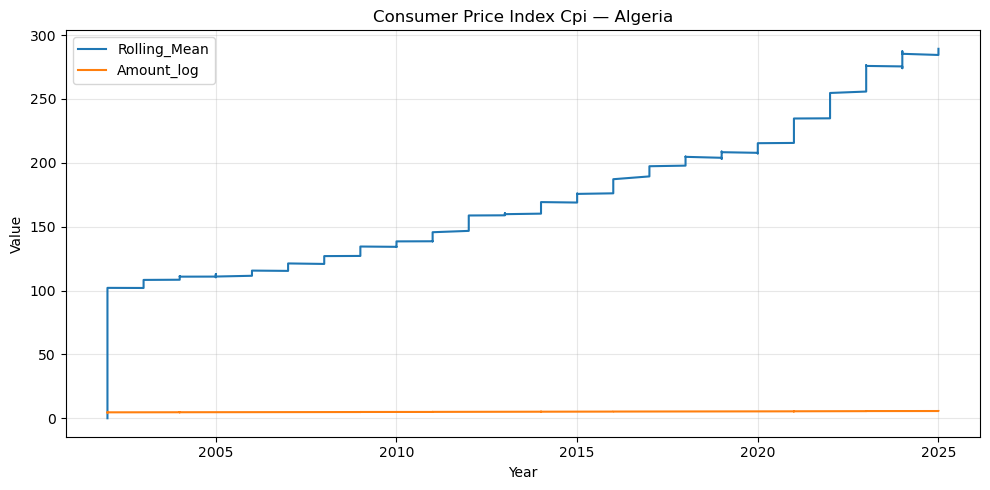

<Figure size 640x480 with 0 Axes>

In [205]:
plot_indicator(df, "consumer_price_index_cpi", "Algeria")
plt.savefig("consumer_price_index_cpi.png")

<Axes: xlabel='YoY_Growth', ylabel='Rolling_Mean'>

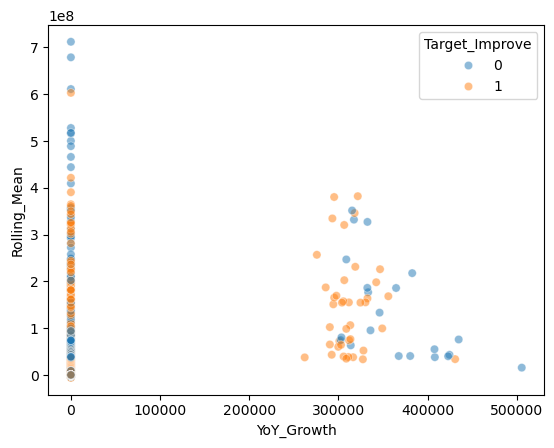

In [206]:
sns.scatterplot(
    data=df,
    x="YoY_Growth",
    y="Rolling_Mean",
    hue="Target_Improve",
    alpha=0.5
)


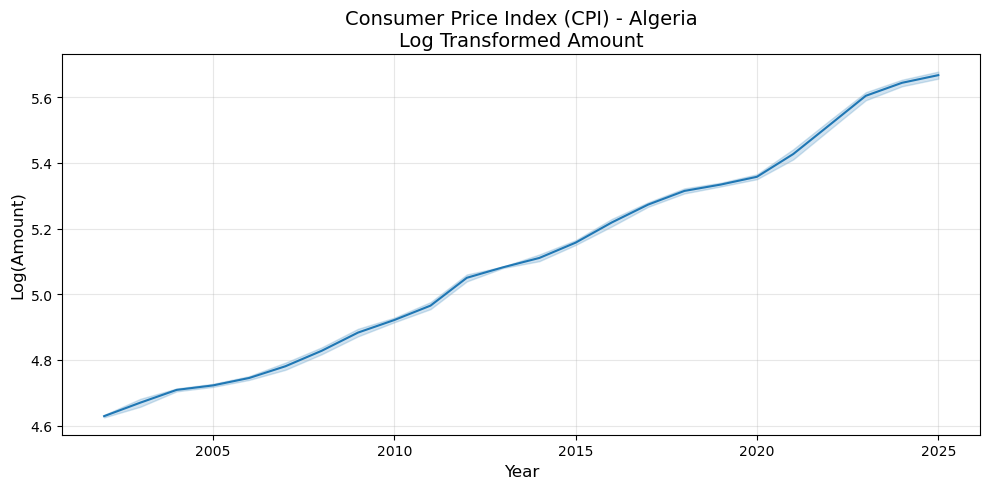

In [207]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_cp, x="Year", y="Amount_log")

plt.title("Consumer Price Index (CPI) - Algeria\nLog Transformed Amount", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Log(Amount)", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
plt.savefig("cpi_algeria_amount_log.png", dpi=300)

plt.show()

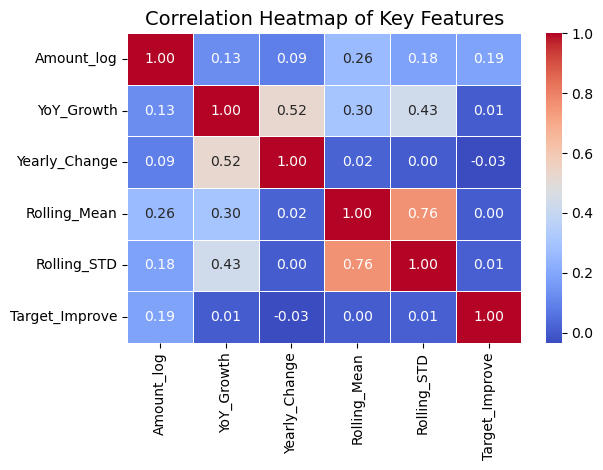

In [208]:
corr_cols = ["Amount_log", "YoY_Growth", "Yearly_Change", 
             "Rolling_Mean", "Rolling_STD", "Target_Improve"]

sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Key Features", fontsize=14)
plt.tight_layout()


plt.savefig("feature_correlation_heatmap.png", dpi=300)

plt.show()


In [209]:
df

,Country,Indicator,Time,Amount,Unit_clean,unit_multiplier,Amount_standard,Year,Amount_log,YoY_Growth,Yearly_Change,Rolling_Mean,Rolling_STD,Target_Improve
0,Algeria,consumer_price_index_cpi,2002-01-01,101.74,Points,1.000000e+00,1.017400e+02,2002,4.632202,0.000000,0.00,0.000000,0.000000,1
1,Algeria,consumer_price_index_cpi,2002-02-01,102.16,Points,1.000000e+00,1.021600e+02,2002,4.636281,0.004128,0.42,0.000000,0.000000,0
2,Algeria,consumer_price_index_cpi,2002-03-01,101.94,Points,1.000000e+00,1.019400e+02,2002,4.634146,-0.002153,-0.22,101.946667,0.210079,0
3,Algeria,consumer_price_index_cpi,2002-04-01,101.34,Points,1.000000e+00,1.013400e+02,2002,4.628301,-0.005886,-0.60,101.813333,0.424421,0
4,Algeria,consumer_price_index_cpi,2002-05-01,100.61,Points,1.000000e+00,1.006100e+02,2002,4.621142,-0.007203,-0.73,101.296667,0.666058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Togo,tax_revenue,2020-01-01,655.20,Billion,1.000000e+09,6.552000e+11,2020,6.486466,0.046311,29.00,609.433333,56.063030,1
23695,Togo,tax_revenue,2021-01-01,779.60,Billion,1.000000e+09,7.796000e+11,2021,6.660063,0.189866,124.40,687.000000,81.494294,1
23696,Togo,tax_revenue,2022-01-01,864.80,Billion,1.000000e+09,8.648000e+11,2022,6.763654,0.109287,85.20,766.533333,105.409171,1
23697,Togo,tax_revenue,2023-01-01,991.60,Billion,1.000000e+09,9.916000e+11,2023,6.900328,0.146623,126.80,878.666667,106.678083,1


In [210]:
df_model = df[[
    "Country",
    "Indicator",
    "Year",
    "Amount_standard"
]].copy()


In [211]:
df_model = df_model.dropna(subset=["Amount_standard"])


In [212]:
df_wide = df_model.pivot_table(
    index=["Country", "Year"],
    columns="Indicator",
    values="Amount_standard",
    aggfunc="mean"   # safe even if duplicates exist
).reset_index()


In [213]:
df_wide = df_wide.sort_values(["Country", "Year"])

df_wide = df_wide.groupby("Country").apply(lambda g: g.ffill().bfill()).reset_index(drop=True)


In [214]:
df_wide = df_wide.fillna(df_wide.mean(numeric_only=True))


In [215]:
numeric_cols = df_wide.select_dtypes(include="number").columns
df_wide[numeric_cols] = df_wide[numeric_cols].astype(float)


In [217]:
from scipy import stats


df_no_outliers = df_wide.copy()
for col in numeric_cols:
    z = np.abs(stats.zscore(df_no_outliers[col], nan_policy='omit'))
    df_no_outliers[col] = np.where(z > 3, np.nan, df_no_outliers[col])

df_no_outliers = df_no_outliers.fillna(df_no_outliers.mean(numeric_only=True))


In [277]:
df_final = df_no_outliers.copy()


In [278]:
df_final

Indicator,Country,Year,budget_deficit,budget_deficitsurplus,budget_surplus,capital_expenditure,consumer_price_index_cpi,defence_expenditure,education_expenditure,expenditure,...,inflation_rate_,interest_rate,labour_force,nominal_gdp,population,real_gdp,revenue,tax_revenue,unemployment_rate,value_added_tax_vat
0,Algeria,1977.0,-4.524192e+11,0.0,3.707285e+10,7.532352e+11,101.432500,6.558216e+10,2.935095e+10,1.809844e+12,...,0.052025,0.492364,2.253644e+07,1.835043e+06,3.365886e+07,6.953098e+12,1.064371e+12,1.017017e+12,7.700281,7.006992e+11
1,Algeria,1978.0,-4.524192e+11,0.0,3.707285e+10,7.532352e+11,101.432500,6.558216e+10,2.935095e+10,1.809844e+12,...,0.052025,0.492364,2.253644e+07,1.835043e+06,3.365886e+07,6.953098e+12,1.064371e+12,1.017017e+12,7.700281,7.006992e+11
2,Algeria,1979.0,-4.524192e+11,0.0,3.707285e+10,7.532352e+11,101.432500,6.558216e+10,2.935095e+10,1.809844e+12,...,0.052025,0.492364,2.253644e+07,1.835043e+06,3.365886e+07,6.953098e+12,1.064371e+12,1.017017e+12,7.700281,7.006992e+11
3,Algeria,1980.0,-4.524192e+11,0.0,3.707285e+10,7.532352e+11,101.432500,6.558216e+10,2.935095e+10,1.809844e+12,...,0.052025,0.492364,2.253644e+07,1.835043e+06,3.365886e+07,6.953098e+12,1.064371e+12,1.017017e+12,7.700281,7.006992e+11
4,Algeria,1981.0,-4.524192e+11,0.0,3.707285e+10,7.532352e+11,101.432500,6.558216e+10,2.935095e+10,1.809844e+12,...,0.052025,0.492364,2.253644e+07,1.835043e+06,3.365886e+07,6.953098e+12,1.064371e+12,1.017017e+12,7.700281,7.006992e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Togo,2021.0,-2.155000e+11,0.0,6.800000e+10,3.798300e+11,110.838333,6.558216e+10,2.935095e+10,1.139400e+12,...,0.045333,0.075650,2.253644e+07,4.625840e+12,8.644829e+06,3.951910e+12,1.139400e+12,7.796000e+11,7.700281,7.006992e+11
619,Togo,2022.0,-4.223000e+11,0.0,6.800000e+10,6.108000e+11,119.266667,6.558216e+10,2.935095e+10,1.477200e+12,...,0.076333,0.071908,2.253644e+07,5.104800e+12,8.848699e+06,4.183090e+12,1.477200e+12,8.648000e+11,7.700281,7.006992e+11
620,Togo,2023.0,-3.705000e+11,0.0,6.800000e+10,6.108000e+11,125.614167,6.558216e+10,2.935095e+10,1.642800e+12,...,0.053217,0.075517,2.253644e+07,5.613200e+12,9.053799e+06,4.452700e+12,1.642800e+12,9.916000e+11,7.700281,7.006992e+11
621,Togo,2024.0,-3.626000e+11,0.0,6.800000e+10,6.108000e+11,129.209167,6.558216e+10,2.935095e+10,1.703600e+12,...,0.028817,0.075383,2.253644e+07,6.098400e+12,9.053799e+06,4.731470e+12,1.703600e+12,1.113400e+12,7.700281,7.006992e+11


In [279]:
df_final['Target_Improve'] = (df_final['gdp_growth_rate'] > 0).astype(int)


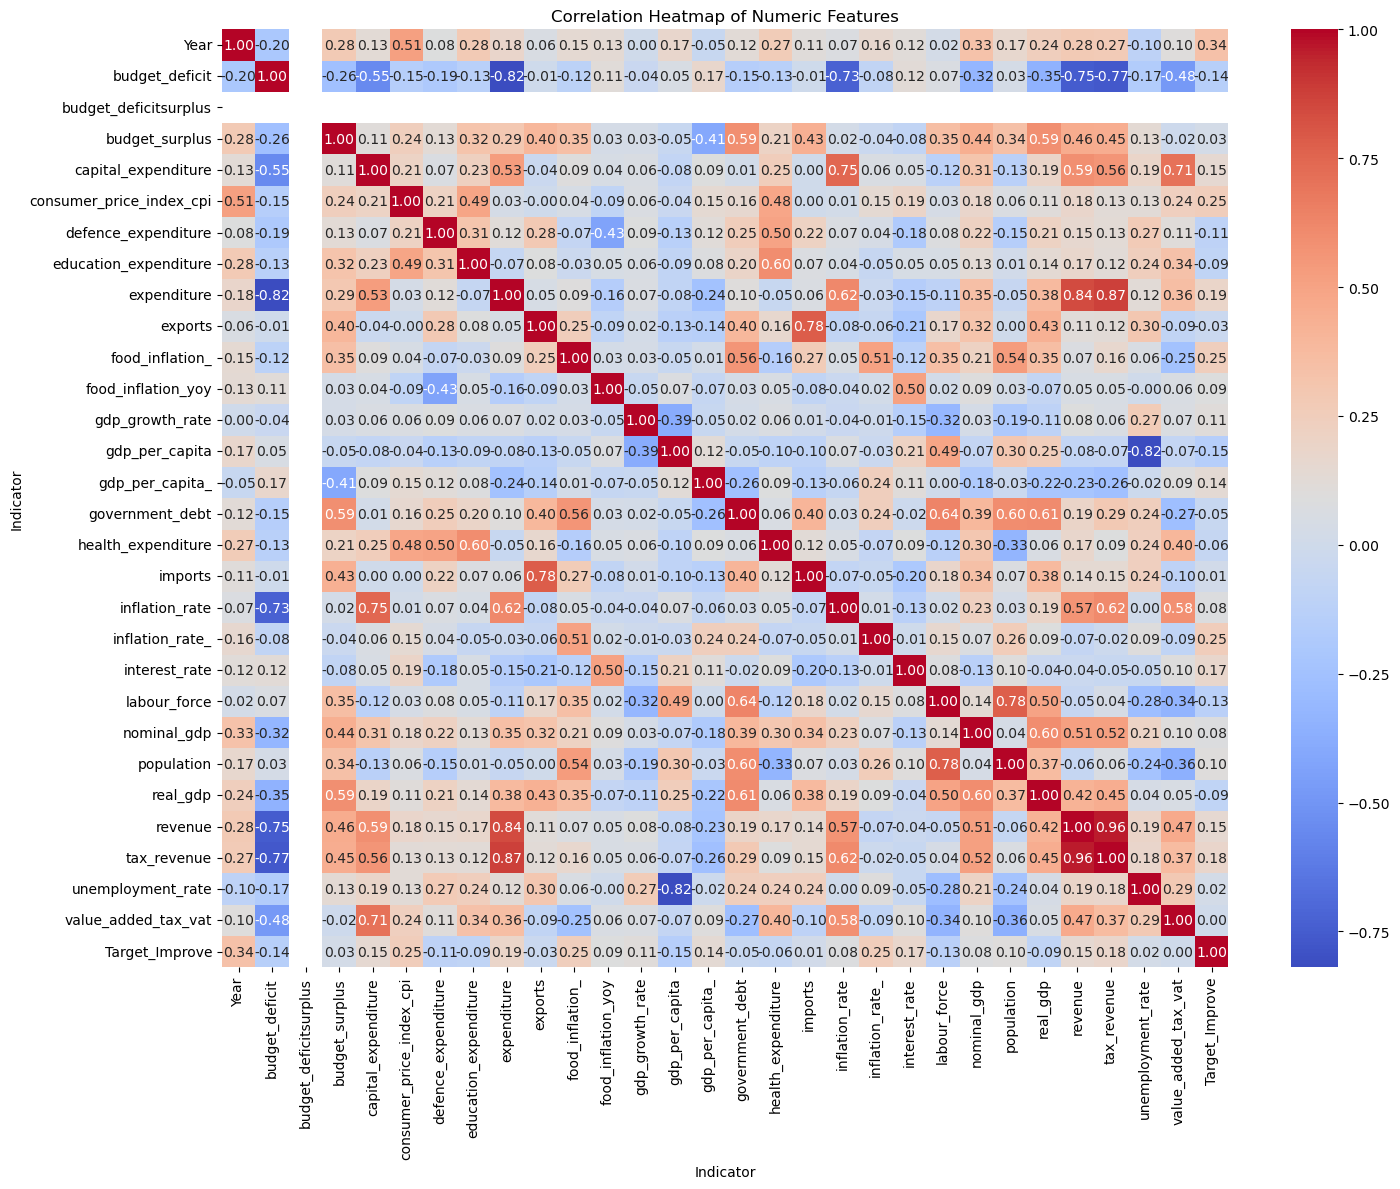

In [280]:
numeric_df = df_final.select_dtypes(include=["float64", "int64", "Int64"])

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.savefig("correlation_numeric.png", dpi=300)
plt.show()

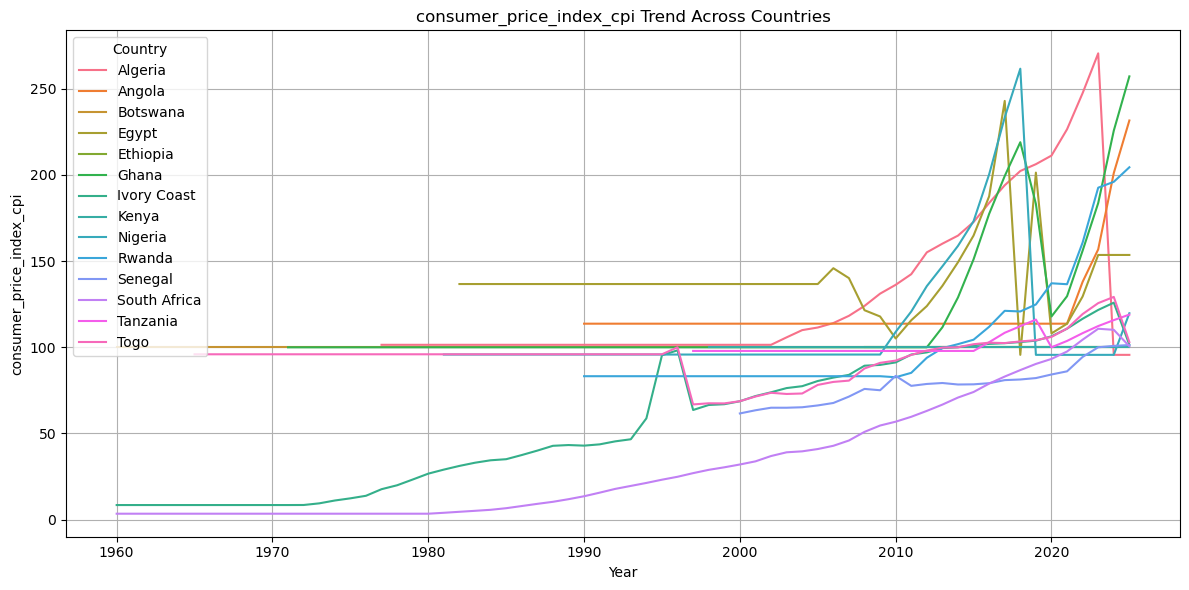

In [281]:
indicator = "consumer_price_index_cpi"

plt.figure(figsize=(12,6))
sns.lineplot(data=df_final, x="Year", y=indicator, hue="Country")
plt.title(f"{indicator} Trend Across Countries")
plt.xlabel("Year")
plt.ylabel(indicator)
plt.grid(True)
plt.tight_layout()
plt.show()


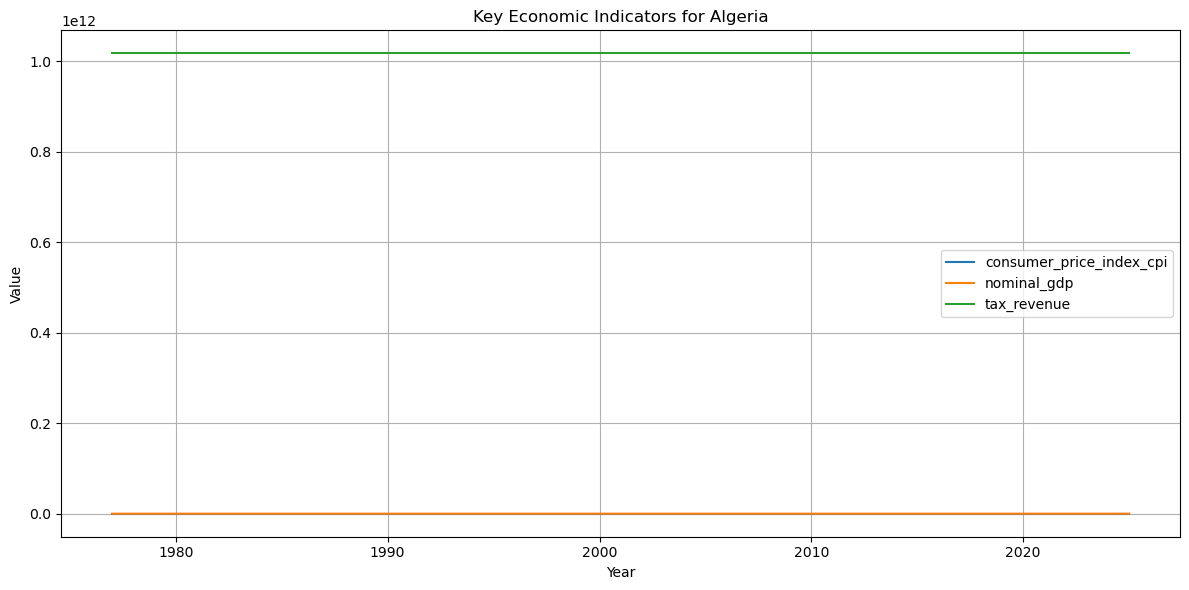

In [282]:
country = "Algeria"


indicators = [
    "consumer_price_index_cpi",
    "nominal_gdp",
    "tax_revenue"
]

df_c = df_final[df_final["Country"] == country]

plt.figure(figsize=(12, 6))

for col in indicators:
    if col in df_c.columns:
        plt.plot(df_c["Year"], df_c[col], label=col)
    else:
        print(f"⚠️ Column '{col}' not found! Skipping it.")

plt.title(f"Key Economic Indicators for {country}")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{country}_multi_indicator_trend.png", dpi=300)
plt.show()


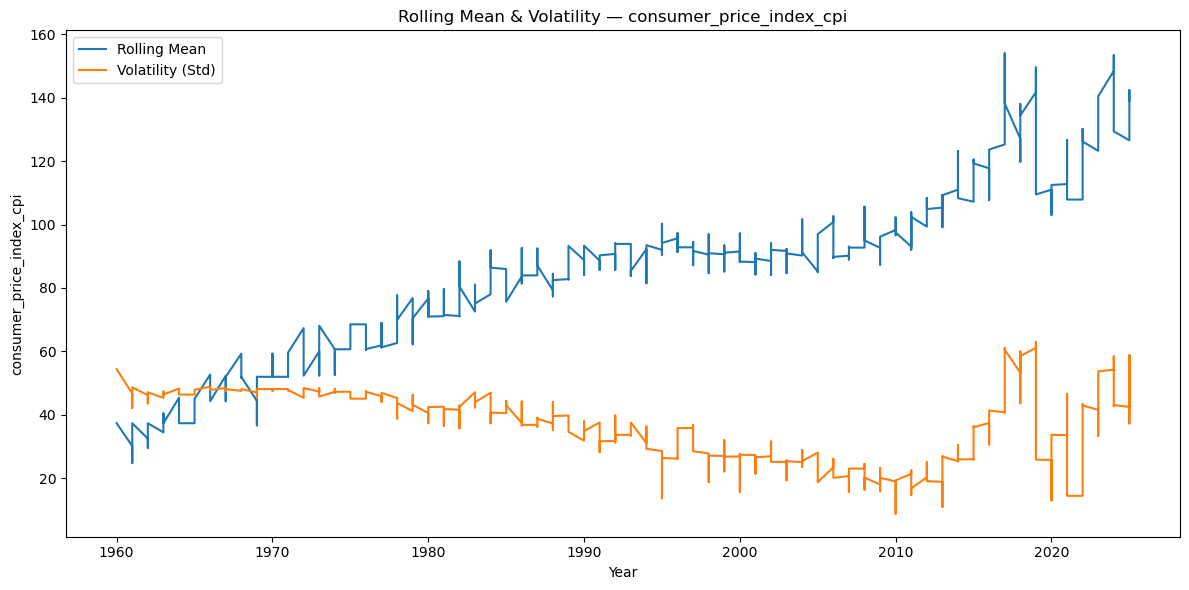

In [283]:
indicator = "consumer_price_index_cpi"

df_roll = df_final.sort_values("Year")
df_roll["Rolling_Mean"] = df_roll[indicator].rolling(12, min_periods=3).mean()
df_roll["Rolling_STD"] = df_roll[indicator].rolling(12, min_periods=3).std()

plt.figure(figsize=(12,6))
plt.plot(df_roll["Year"], df_roll["Rolling_Mean"], label="Rolling Mean")
plt.plot(df_roll["Year"], df_roll["Rolling_STD"], label="Volatility (Std)")

plt.title(f"Rolling Mean & Volatility — {indicator}")
plt.xlabel("Year")
plt.ylabel(indicator)
plt.legend()
plt.tight_layout()
plt.savefig(f"{indicator}_rolling_stats.png", dpi=300)
plt.show()


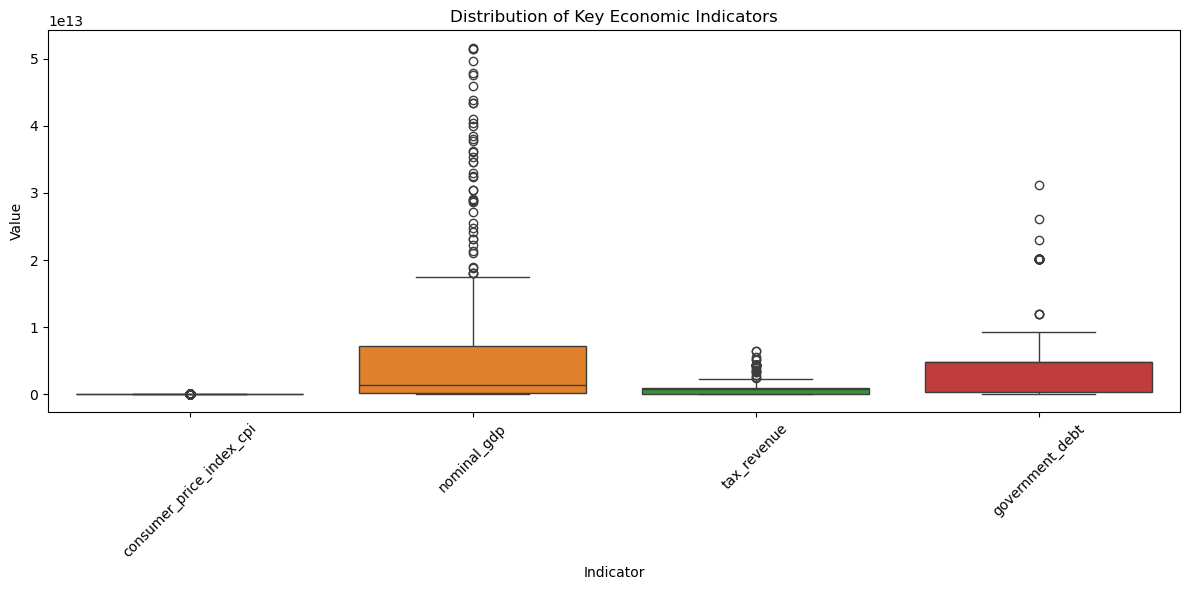

In [284]:
indicators = [
    "consumer_price_index_cpi",
    "nominal_gdp",
    "tax_revenue",
    "government_debt"
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final[indicators])
plt.title("Distribution of Key Economic Indicators")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("indicator_boxplots.png", dpi=300)
plt.show()


In [285]:

df_final = pd.get_dummies(df_final, columns=["Country"], drop_first=True).astype("int64")


In [286]:
scaler = StandardScaler()


pipelines = {
    "LogisticRegression": Pipeline([
        ("preprocess", scaler),
        ("model", LogisticRegression(max_iter=500))
    ]),

    "DecisionTree": Pipeline([
        ("preprocess", scaler),
        ("model", DecisionTreeClassifier())
    ]),

    "RandomForest": Pipeline([
        ("preprocess", scaler),
        ("model", RandomForestClassifier())
    ]),

    "KNN": Pipeline([
        ("preprocess", scaler),
        ("model", KNeighborsClassifier())
    ]),

    "GradientBoost": Pipeline([
        ("preprocess", scaler),
        ("model", GradientBoostingClassifier())
    ]),
}


In [287]:
param_grid = {
    "LogisticRegression": {
        "model__C": [0.1, 1, 3, 5, 10],
        "model__penalty": ["l2"]
    },

    "DecisionTree": {
        "model__max_depth": [3, 5, 7, 10, None],
        "model__min_samples_split": [2, 5, 10]
    },

    "RandomForest": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [5, 10, None],
        "model__min_samples_split": [2, 5, 10]
    },

    "KNN": {
        "model__n_neighbors": [3, 5, 7, 9],
        "model__weights": ["uniform", "distance"]
    },

    "GradientBoost": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.05, 0.1, 0.2],
        "model__max_depth": [2, 3]
    }
}


In [288]:
X = df_final.drop("Target_Improve", axis = 1)
Y = df_final["Target_Improve"]

In [289]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [291]:
results = []

for name, pipe in pipelines.items():
    print(f"\n🔧 Training and tuning {name}...")

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid[name],
        cv=5,
        scoring="f1",   # IMPORTANT: For classification
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    # Predictions
    y_pred = grid.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store Results
    results.append([
        name,
        round(accuracy, 4),
        round(f1, 4),
        grid.best_params_
    ])


🔧 Training and tuning LogisticRegression...

🔧 Training and tuning DecisionTree...

🔧 Training and tuning RandomForest...

🔧 Training and tuning KNN...


  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.


🔧 Training and tuning GradientBoost...


In [292]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Best Params"])
results_df

,Model,Accuracy,F1 Score,Best Params
0,LogisticRegression,0.936,0.9626,"{'model__C': 0.1, 'model__penalty': 'l2'}"
1,DecisionTree,0.936,0.9630,"{'model__max_depth': 3, 'model__min_samples_sp..."
2,RandomForest,0.944,0.9677,"{'model__max_depth': 5, 'model__min_samples_sp..."
3,KNN,0.936,0.9630,"{'model__n_neighbors': 5, 'model__weights': 'd..."
4,GradientBoost,0.944,0.9677,"{'model__learning_rate': 0.05, 'model__max_dep..."
